**Welcome to Predicting Students' Employability!** In this code we shall use a machine learning model and various visualization tools to predict if a student from the Philippines will be employable or not based from a number of factors (refer to the dataset: *Students' Employability Dataset - Philippines*).

In [1]:
# Import necessary packages

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/students-employability-dataset/Student-Employability-Datasets.xlsx


In [2]:
import tensorflow as tf
import tensorflow_decision_forests as tfdf
import seaborn as sns
import matplotlib.pyplot as plt

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

In [3]:
print("TensorFlow v" + tf.__version__)
print("TensorFlow Decision Forests v" + tfdf.__version__)

TensorFlow v2.12.0
TensorFlow Decision Forests v1.4.0


In [4]:
# import the data

train_file_path = "/kaggle/input/students-employability-dataset/Student-Employability-Datasets.xlsx"
dataset_df = pd.read_excel(train_file_path)
print("Full train dataset shape is {}".format(dataset_df.shape))

Full train dataset shape is (2982, 10)


In [5]:
dataset_df.head(3)

,Name of Student,GENERAL APPEARANCE,MANNER OF SPEAKING,PHYSICAL CONDITION,MENTAL ALERTNESS,SELF-CONFIDENCE,ABILITY TO PRESENT IDEAS,COMMUNICATION SKILLS,Student Performance Rating,CLASS
0,Student 1,4,5,4,5,5,5,5,5,Employable
1,Student 2,4,4,4,4,4,4,3,5,Employable
2,Student 3,4,3,3,3,3,3,2,5,LessEmployable


In [6]:
# removing the first column

dataset_df = dataset_df.drop('Name of Student', axis=1)
dataset_df.head(3)

,GENERAL APPEARANCE,MANNER OF SPEAKING,PHYSICAL CONDITION,MENTAL ALERTNESS,SELF-CONFIDENCE,ABILITY TO PRESENT IDEAS,COMMUNICATION SKILLS,Student Performance Rating,CLASS
0,4,5,4,5,5,5,5,5,Employable
1,4,4,4,4,4,4,3,5,Employable
2,4,3,3,3,3,3,2,5,LessEmployable


In [7]:
# replace result to a numerical value to avoid problems in tensorflow

dataset_df['CLASS'] = dataset_df['CLASS'].replace({'Employable': 1, 
                                                   'LessEmployable': 0})
dataset_df.head(3)

,GENERAL APPEARANCE,MANNER OF SPEAKING,PHYSICAL CONDITION,MENTAL ALERTNESS,SELF-CONFIDENCE,ABILITY TO PRESENT IDEAS,COMMUNICATION SKILLS,Student Performance Rating,CLASS
0,4,5,4,5,5,5,5,5,1
1,4,4,4,4,4,4,3,5,1
2,4,3,3,3,3,3,2,5,0


In [8]:
# Let's look at the data type of each column

dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2982 entries, 0 to 2981
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   GENERAL APPEARANCE          2982 non-null   int64
 1   MANNER OF SPEAKING          2982 non-null   int64
 2   PHYSICAL CONDITION          2982 non-null   int64
 3   MENTAL ALERTNESS            2982 non-null   int64
 4   SELF-CONFIDENCE             2982 non-null   int64
 5   ABILITY TO PRESENT IDEAS    2982 non-null   int64
 6   COMMUNICATION SKILLS        2982 non-null   int64
 7   Student Performance Rating  2982 non-null   int64
 8   CLASS                       2982 non-null   int64
dtypes: int64(9)
memory usage: 209.8 KB


In [9]:
list(set(dataset_df.dtypes.tolist()))

[dtype('int64')]

In [10]:
df_num = dataset_df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,GENERAL APPEARANCE,MANNER OF SPEAKING,PHYSICAL CONDITION,MENTAL ALERTNESS,SELF-CONFIDENCE,ABILITY TO PRESENT IDEAS,COMMUNICATION SKILLS,Student Performance Rating,CLASS
0,4,5,4,5,5,5,5,5,1
1,4,4,4,4,4,4,3,5,1
2,4,3,3,3,3,3,2,5,0
3,3,3,3,2,3,3,3,5,0
4,4,4,3,3,4,4,3,5,1


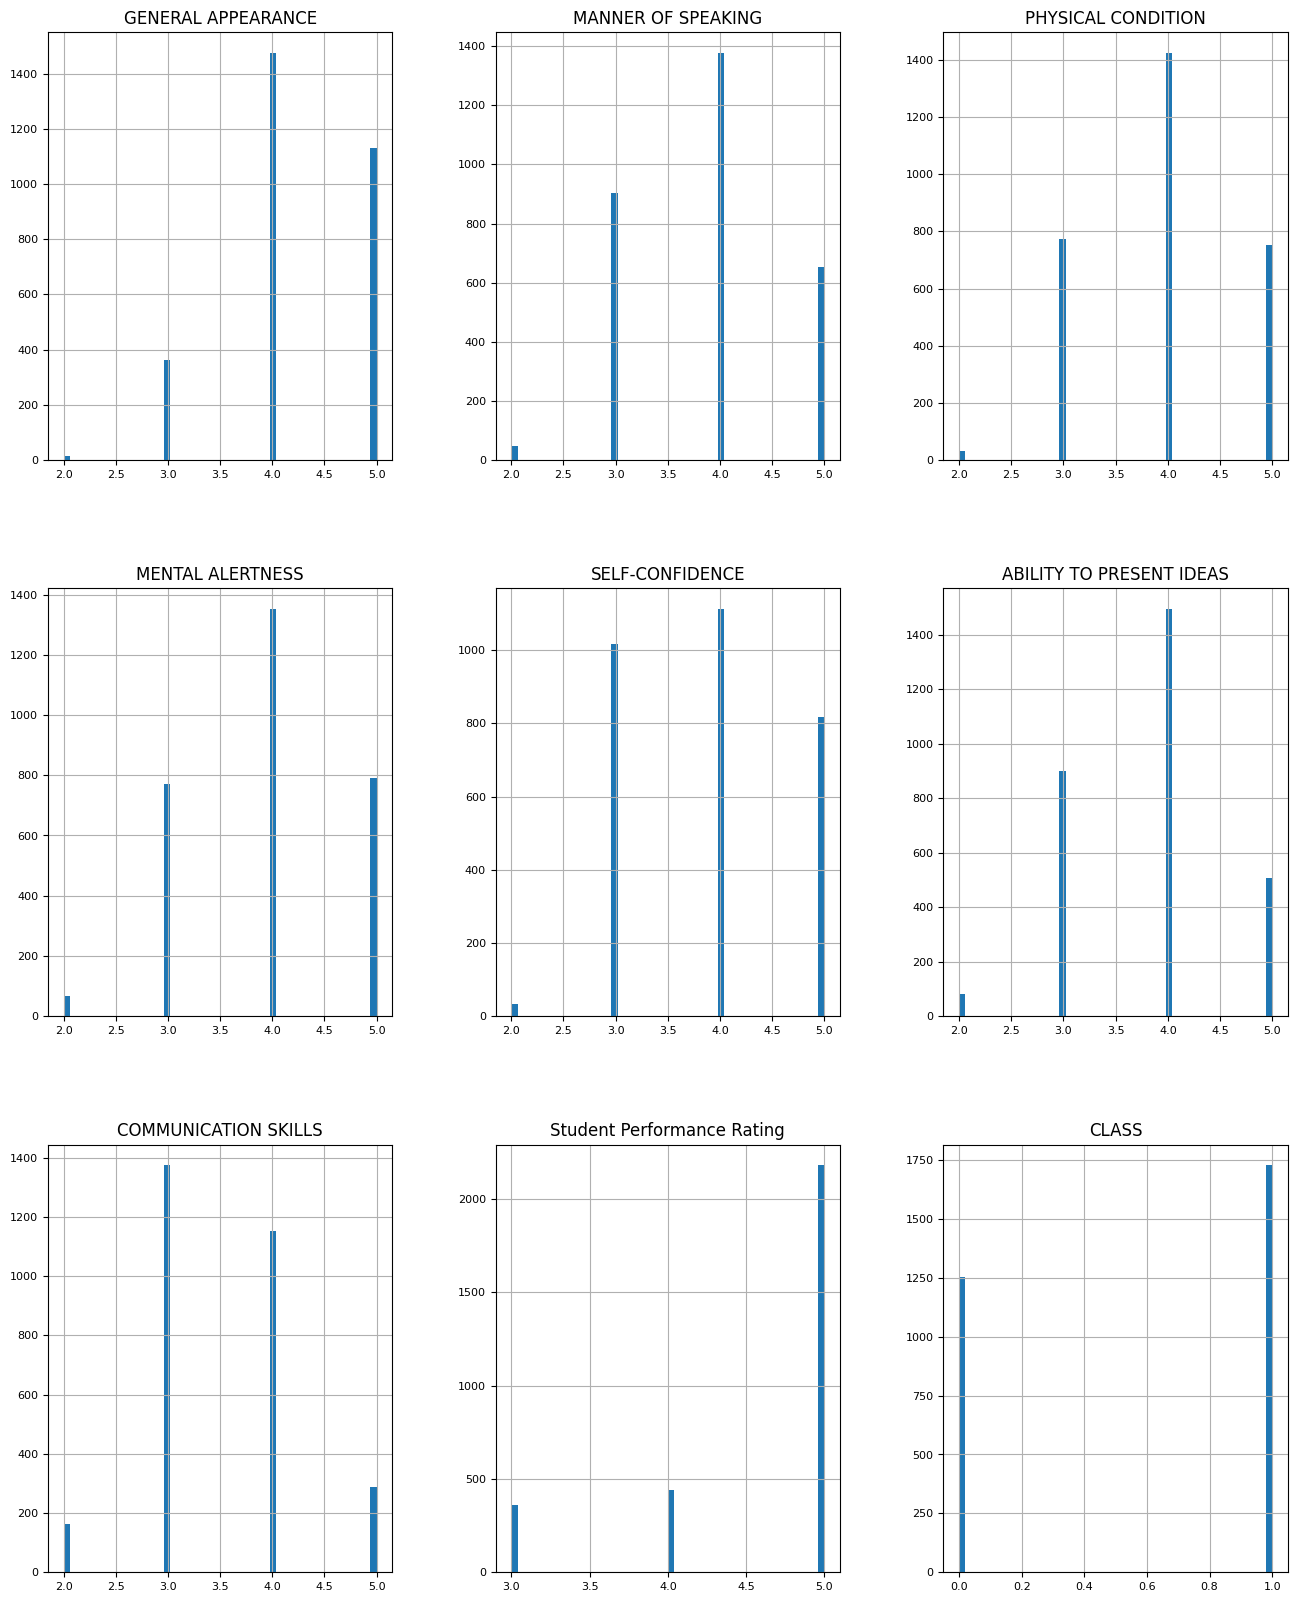

In [11]:
# Create histogram for each column

df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [12]:
# now we slit the data into train and for validation

def split_dataset(dataset, test_ratio=0.30):
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]

train_ds_pd, valid_ds_pd = split_dataset(dataset_df)
print("{} examples in training, {} examples in testing.".format(
    len(train_ds_pd), len(valid_ds_pd)))

2087 examples in training, 895 examples in testing.


In [13]:
# now convert the data into a dataframe for tensorflow with the column 'CLASS' as output

label = 'CLASS'
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, 
                                                 label=label, 
                                                 task = tfdf.keras.Task.REGRESSION)
valid_ds = tfdf.keras.pd_dataframe_to_tf_dataset(valid_ds_pd, 
                                                 label=label, 
                                                 task = tfdf.keras.Task.REGRESSION)

In [14]:
# Create random forest model

rf = tfdf.keras.RandomForestModel(task = tfdf.keras.Task.REGRESSION)
rf.compile(metrics=["mse"])

Use /tmp/tmplhh5s60m as temporary training directory


In [15]:
# fit the training data

rf.fit(x=train_ds)

Reading training dataset...
Training dataset read in 0:00:05.797202. Found 2087 examples.
Training model...


[INFO 23-10-25 01:22:26.6692 UTC kernel.cc:1243] Loading model from path /tmp/tmplhh5s60m/model/ with prefix d03472824c064acd
[INFO 23-10-25 01:22:26.8524 UTC decision_forest.cc:660] Model loaded with 300 root(s), 47442 node(s), and 8 input feature(s).
[INFO 23-10-25 01:22:26.8526 UTC abstract_model.cc:1311] Engine "RandomForestOptPred" built
[INFO 23-10-25 01:22:26.8527 UTC kernel.cc:1075] Use fast generic engine


Model trained in 0:00:00.680955
Compiling model...
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Model compiled.


In [16]:
tfdf.model_plotter.plot_model_in_colab(rf, tree_idx=0, max_depth=3)

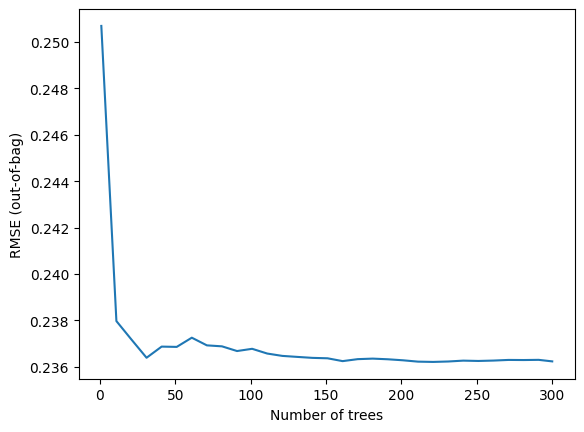

In [17]:
logs = rf.make_inspector().training_logs()
plt.plot([log.num_trees for log in logs], [log.evaluation.rmse for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("RMSE (out-of-bag)")
plt.show()

In [18]:
inspector = rf.make_inspector()
inspector.evaluation()

Evaluation(num_examples=2087, accuracy=None, loss=None, rmse=0.2362277532604342, ndcg=None, aucs=None, auuc=None, qini=None)

In [19]:
evaluation = rf.evaluate(x=valid_ds,return_dict=True)

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

1/1 [==============================] - 0s 451ms/step - loss: 0.0000e+00 - mse: 0.0586
loss: 0.0000
mse: 0.0586


In [21]:
# Now the model is created and validated, we can proceed with predicting

df2 = pd.read_excel("/kaggle/input/students-employability-dataset/Student-Employability-Datasets.xlsx")
test_data = df2.loc[2087:,:]
names = test_data.pop('Name of Student')


In [22]:
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(
    test_data,
    task = tfdf.keras.Task.REGRESSION)

preds = rf.predict(test_ds)
output = pd.DataFrame({'Name of Student': names,
                       'CLASS': preds.squeeze()})

output.head()

1/1 [==============================] - 0s 158ms/step


,Name of Student,CLASS
2087,Student 2098,0.990584
2088,Student 2099,0.973285
2089,Student 2100,0.000000
2090,Student 2101,0.022271
2091,Student 2102,0.987222


In [23]:
# we can observe the output of the model matches that of the real data 

df2.loc[2087:2091,:]

,Name of Student,GENERAL APPEARANCE,MANNER OF SPEAKING,PHYSICAL CONDITION,MENTAL ALERTNESS,SELF-CONFIDENCE,ABILITY TO PRESENT IDEAS,COMMUNICATION SKILLS,Student Performance Rating,CLASS
2087,Student 2098,4,3,4,3,3,3,3,5,Employable
2088,Student 2099,4,3,4,3,3,3,2,5,Employable
2089,Student 2100,2,2,3,3,3,3,3,5,LessEmployable
2090,Student 2101,4,4,3,4,3,4,3,4,LessEmployable
2091,Student 2102,4,4,4,3,3,4,3,5,Employable
